## Import Libaries

In [1]:
from math import sin, cos, log, ceil
import numpy
import math
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Suppose you wanted to participate in a paper-airplane competition, and you want to use what you know about the phugoid model to improve your chances. For a given value of L/D that you can obtain in your design, you want to know what is the best initial velocity and launch angle to fly the longest distance from a given height.

Using the phugoid model, write a new code to analyze the flight of a paper airplane, with the following conditions:
Assume L/D of 5.0 (a value close to measurements in Feng et al. 2009)

For the trim velocity, let's take an average value of 4.9 m/s.
Find a combination of launch angle and velocity that gives the best distance.
Think about how you will know when the flight needs to stop ... this will influence how you organize the code.
How can you check if your answer is realistic?

## Method

Method: In this Notebook, I used different angles to examine the flight path. Each angle has a corresponding initial velocity associated with that angle. For example, for a launch angle of theta_init = 10 degrees, the initial velocity is taken as v_0 = v_trim/cos(theta_init). Additionally, the Terminal flight time is taken as 15 seconds. An interesting observation is that with a shorter flight time, a negative launch angle gives a longer travel distance. 

A separate notebook will account for different launch angles but it will maintain a constant launch velocity to isolate the effect of launch angle. 

In [2]:
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 4.9   # trim velocity in m s^{-1}   
C_D = 1/5  # drag coefficient --- or D/L if C_L=1
C_L = 1   # for convenience, use C_L = 1

### set initial conditions ###

x0 = 0     # horizotal position is arbitrary
y0 =2.0  # initial altitude
#----------------------------------------------

#set angle and determine v0 from angle and trim velocity

#trial 1
theta0_1 = 0 # initial angle of trajectory
v0_1 = v_t     # start at the trim velocity (or add a delta)

#trial2
theta0_2 = math.pi/6 #30 deg
v0_2 = v_t/(math.cos(math.pi/6))

#trial3
theta0_3 = math.pi/4 #45 deg
v0_3 = v_t/(math.cos(math.pi/4))

#trial4
theta0_4 =  (20.*math.pi)/180. #20 deg
v0_4 = v_t/(math.cos(theta0_4))

#trial5
theta0_5 =  -(10.*math.pi)/180. #-10 deg
v0_5 = v_t/(math.cos(theta0_5))

#trial6
theta0_6 =  -(20.*math.pi)/180. #-20 deg
v0_6 = v_t/(math.cos(theta0_6))

#trial6
theta0_7 =  -(25.*math.pi)/180. #-20 deg
v0_7 = v_t/(math.cos(theta0_7))

In [3]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                      -g*cos(theta)/v + g/v_t**2*v,
                      v*cos(theta),
                      v*sin(theta)])

In [4]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [5]:
T = 15                              # final time in seconds
dt = 0.01                           # time increment
N = int(T/dt) + 1                  # number of time-steps
t = numpy.linspace(0, T, N)      # time discretization

TOL = 0.0001

# initialize the array containing the solution for each time-step
u_1 = numpy.empty((N, 4))
u_2 = numpy.empty((N, 4))
u_3 = numpy.empty((N, 4))
u_4 = numpy.empty((N, 4))
u_5 = numpy.empty((N, 4))
u_6 = numpy.empty((N, 4))
u_7 = numpy.empty((N, 4))

u_1[0] = numpy.array([v0_1, theta0_1, x0, y0])
u_2[0] = numpy.array([v0_2, theta0_2, x0, y0])
u_3[0] = numpy.array([v0_3, theta0_3, x0, y0])
u_4[0] = numpy.array([v0_4, theta0_4, x0, y0])
u_5[0] = numpy.array([v0_5, theta0_5, x0, y0])
u_6[0] = numpy.array([v0_6, theta0_6, x0, y0])
u_7[0] = numpy.array([v0_7, theta0_7, x0, y0])

# time loop - Euler method
for n in range(N-1):
    
    u_1[n+1] = euler_step(u_1[n], f, dt)
    u_2[n+1] = euler_step(u_2[n], f, dt)
    u_3[n+1] = euler_step(u_3[n], f, dt)
    u_4[n+1] = euler_step(u_4[n], f, dt)
    u_5[n+1] = euler_step(u_5[n], f, dt)
    u_6[n+1] = euler_step(u_6[n], f, dt)
    u_7[n+1] = euler_step(u_7[n], f, dt)
    
    

In [6]:
#Get Trajectories

# get the glider's position with respect to the time
x_1 = u_1[:,2]
y_1 = u_1[:,3]

x_2 = u_2[:,2]
y_2 = u_2[:,3]

x_3 = u_3[:,2]
y_3 = u_3[:,3]

x_4 = u_4[:,2]
y_4 = u_4[:,3]

x_5 = u_5[:,2]
y_5 = u_5[:,3]

x_6 = u_6[:,2]
y_6 = u_6[:,3]

x_7 = u_7[:,2]
y_7 = u_7[:,3]


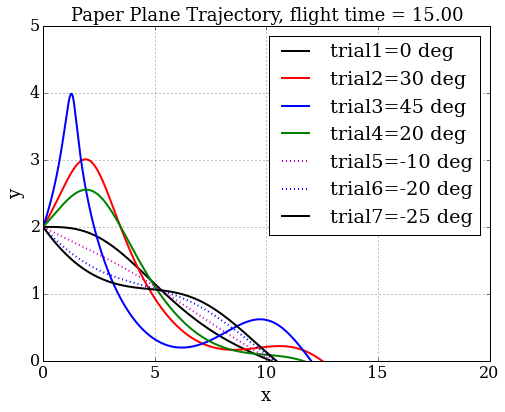

In [7]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.xlim(0,20)
pyplot.ylim(0,5)
pyplot.title('Paper Plane Trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x_1,y_1, color='k', lw=2)
pyplot.plot(x_2,y_2, color='r', lw=2)
pyplot.plot(x_3,y_3, color='b', lw=2)
pyplot.plot(x_4,y_4, color='g', lw=2)
pyplot.plot(x_5,y_5, color='m', lw=2, linestyle = ':')
pyplot.plot(x_6,y_6, color='b', lw=2, linestyle = ':')
pyplot.plot(x_7,y_7, color='k', lw=2, linestyle = '-')
pyplot.legend(['trial1=0 deg','trial2=30 deg', 'trial3=45 deg', 'trial4=20 deg', 'trial5=-10 deg', 'trial6=-20 deg','trial7=-25 deg']);

### Check where the y = 0 values are:

In [8]:
numpy.where(u_1[:,3] <= TOL)

(array([ 219,  220,  221, ..., 1498, 1499, 1500]),)

In [9]:
numpy.where(u_2[:,3] <= TOL)

(array([ 299,  300,  301, ..., 1498, 1499, 1500]),)

In [10]:
numpy.where(u_3[:,3] <= TOL)

(array([ 339,  340,  341, ..., 1498, 1499, 1500]),)

In [11]:
numpy.where(u_4[:,3] <= TOL)

(array([ 264,  265,  266, ..., 1498, 1499, 1500]),)

In [12]:
numpy.where(u_5[:,3] <= TOL)

(array([ 216,  217,  218, ..., 1498, 1499, 1500]),)

In [13]:
numpy.where(u_6[:,3] <= TOL)

(array([ 216,  217,  218, ..., 1498, 1499, 1500]),)

In [14]:
numpy.where(u_7[:,3] <= TOL)

(array([ 216,  217,  218, ..., 1498, 1499, 1500]),)

In [15]:
#check elevation according to x distance (note! we don't want negative y values because zero is the floor)

print(u_1[218,3], u_2[298,3], u_3[338,3], u_4[215,3], u_5[215,3], u_6[215,3], u_7[215,3])

0.00385737416197 0.00559423345565 0.00444563571625 0.109041274848 0.00471519895091 0.00451690883239 0.0135343728478


## Maximum Distance

In [16]:
print('d_max t1 = ', u_1[218,2],' d_max t2 = ', u_2[298,2],' d_max t3 = ', u_3[338,2])

d_max t1 =  10.1720666677  d_max t2 =  12.4742786257  d_max t3 =  11.9943196771


In [17]:
print('d_max t4 = ', u_4[215,2],' d_max t5 = ', u_5[215,2], ' d_max t6 = ', u_6[215,2])

d_max t4 =  9.35503044873  d_max t5 =  10.2185034772  d_max t6 =  10.3506954961


In [18]:
print(' d_max t7 = ', u_7[215,2])

 d_max t7 =  10.3946349481


## Conclusion

Launching at a positive angle of 30 degrees with respect to the horizontal at an initial velocity v_0 = v_trim/cos(30). The terminal time was taken to be 3 seconds. I also ran it for 4 seconds and the launch angle of -15 also gave the best result. This challenge uses different launch angles corresponding to the launch angle and the trim velocity. Another notebook will use different initial conditions to examine the impact of launch angle (using constant velocities).